# Ensemble Methods : Bagging and Boosting

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)

X = df.iloc[50:150, [2, 3]].values
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-virginica', -1, 1)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [3]:
tree_clf = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=1,
                              random_state=1)
tree_clf.fit(X_train, y_train)

bag_clf = BaggingClassifier(base_estimator=tree_clf,
                        n_estimators=500, 
                        max_samples=1.0, 
                        max_features=1.0, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1)
bag_clf.fit(X_train, y_train)

boost_clf = AdaBoostClassifier(base_estimator=tree_clf,
                         n_estimators=500, 
                         learning_rate=1.,
                         random_state=1)
boost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
          learning_rate=1.0, n_estimators=500, random_state=1)

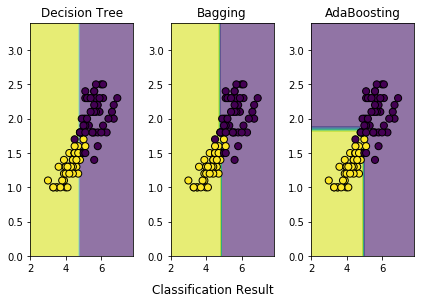

In [4]:
%matplotlib inline

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

plt.subplot(1,3,1)
Z1 = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, edgecolors="k")
plt.title("Decision Tree")

plt.subplot(1,3,2)
Z2 = bag_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, edgecolors="k")
plt.title("Bagging")

plt.subplot(1,3,3)
Z3 = boost_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z3, alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, edgecolors="k")
plt.title("AdaBoosting")

plt.suptitle("Classification Result", y = 0)
plt.tight_layout()
plt.show()

In [5]:
print("Decision Tree train/test accuracies %.3f/%.3f"
      % (tree_clf.score(X_train, y_train), tree_clf.score(X_test, y_test)))
print("Bagging train/test accuracies %.3f/%.3f"
      % (bag_clf.score(X_train, y_train), bag_clf.score(X_test, y_test)))
print("Adaboost train/test accuracies %.3f/%.3f"
      % (boost_clf.score(X_train, y_train), boost_clf.score(X_test, y_test)))

Decision Tree train/test accuracies 0.929/0.933
Bagging train/test accuracies 0.929/0.967
Adaboost train/test accuracies 0.986/0.967
